In [75]:
import numpy as np
import random as rn
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [29]:
df=pd.read_csv('student_data.csv',sep=';')

In [32]:
df.head(3)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12


In [33]:
df.columns                          #Columns name

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

In [36]:
df.dtypes                    #Data Type of columns

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [47]:
## Show single row
df['absences'][0:5]

0    4
1    2
2    6
3    0
4    0
Name: absences, dtype: int64

In [45]:
## Multiple column display
df[['school','Dalc','nursery','G3']][0:5]

,school,Dalc,nursery,G3
0,GP,1,yes,11
1,GP,1,no,11
2,GP,2,yes,12
3,GP,1,yes,14
4,GP,1,yes,13


In [49]:
#if you want to see row 4 to 9 and column 3 to 9 
df.iloc[4:9,3:10]

,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob
4,U,GT3,T,3,3,other,other
5,U,LE3,T,4,3,services,other
6,U,LE3,T,2,2,other,other
7,U,GT3,A,4,4,other,teacher
8,U,LE3,A,3,2,services,other


The subject of statistics is divided into two broad areas that incorporate the collecting, organizing, summarizing, analyzing, and making inferences from data. 
These categories are: 

### Descriptive statistics and Inferential statistics. ###

Descriptive Statistics Includes Collecting Organizing Summarizing Presenting 

#### Descriptive Statistics Includes
Collecting

Organizing 

Summarizing

Presenting

#### An Inferential Statistics Includes

Making Inferences 

Hypothesis Testing

Determining

Relationships

Making Predictions

### Descriptive Analysis: Exploratory Analysis

In [54]:
df.describe()                               

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [55]:
df.describe(include=['object'])                     #For Object Data Types

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
count,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649,649
unique,2,2,2,2,2,5,5,4,3,2,2,2,2,2,2,2,2
top,GP,F,U,GT3,T,other,other,course,mother,no,yes,no,no,yes,yes,yes,no
freq,423,383,452,457,569,258,367,285,455,581,398,610,334,521,580,498,410


In [59]:
#Exploring more about the categorical Variables
for col in df.columns:
    if df[col].dtype == 'object':
        print('\nColumn Name:', col,)
        print(df[col].value_counts())


Column Name: school
GP    423
MS    226
Name: school, dtype: int64

Column Name: sex
F    383
M    266
Name: sex, dtype: int64

Column Name: address
U    452
R    197
Name: address, dtype: int64

Column Name: famsize
GT3    457
LE3    192
Name: famsize, dtype: int64

Column Name: Pstatus
T    569
A     80
Name: Pstatus, dtype: int64

Column Name: Mjob
other       258
services    136
at_home     135
teacher      72
health       48
Name: Mjob, dtype: int64

Column Name: Fjob
other       367
services    181
at_home      42
teacher      36
health       23
Name: Fjob, dtype: int64

Column Name: reason
course        285
home          149
reputation    143
other          72
Name: reason, dtype: int64

Column Name: guardian
mother    455
father    153
other      41
Name: guardian, dtype: int64

Column Name: schoolsup
no     581
yes     68
Name: schoolsup, dtype: int64

Column Name: famsup
yes    398
no     251
Name: famsup, dtype: int64

Column Name: paid
no     610
yes     39
Name: paid, dty

### Decriptivtive Analysis: Univariate Analysis

Univariate Analysis of  school


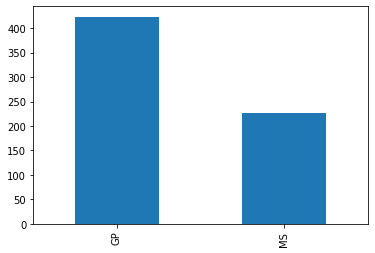

Univariate Analysis of  sex


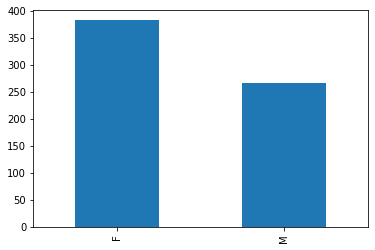

Univariate Analysis of  age


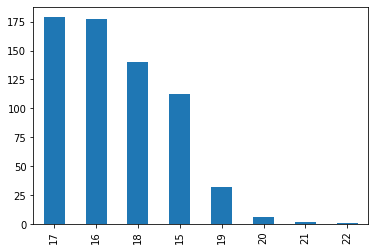

Univariate Analysis of  address


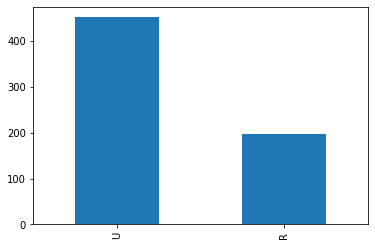

Univariate Analysis of  famsize


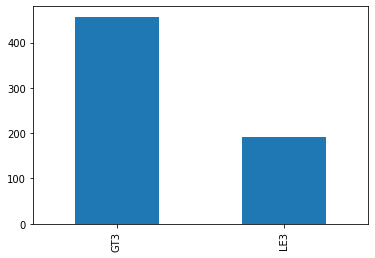

Univariate Analysis of  Pstatus


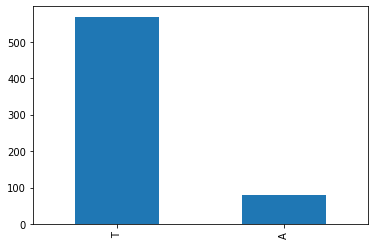

Univariate Analysis of  Medu


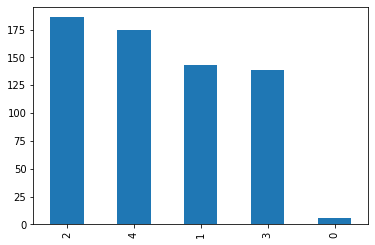

Univariate Analysis of  Fedu


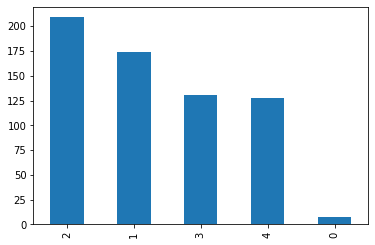

Univariate Analysis of  Mjob


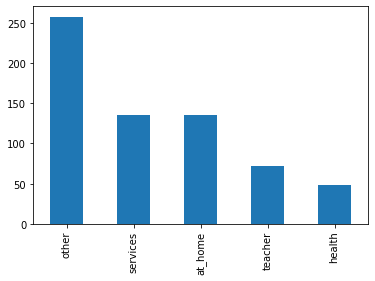

Univariate Analysis of  Fjob


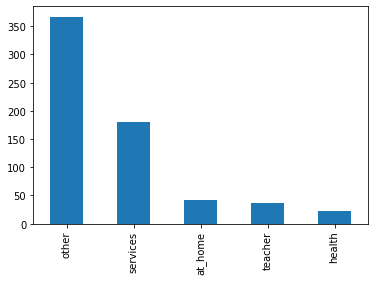

Univariate Analysis of  reason


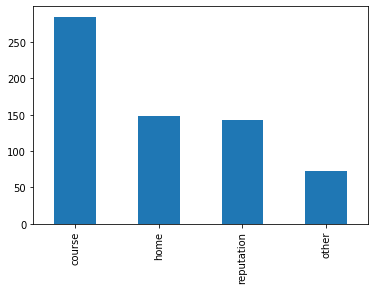

Univariate Analysis of  guardian


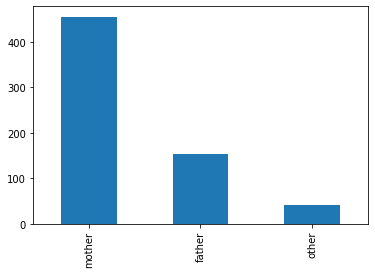

Univariate Analysis of  traveltime


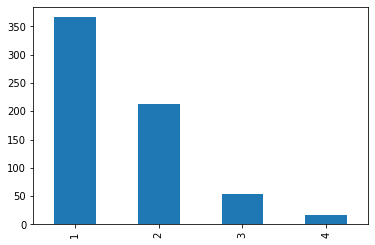

Univariate Analysis of  studytime


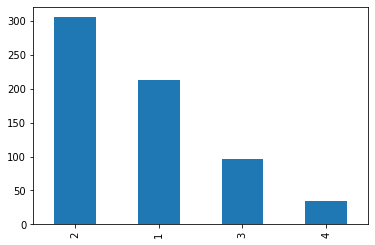

Univariate Analysis of  failures


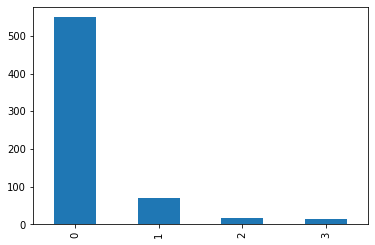

Univariate Analysis of  schoolsup


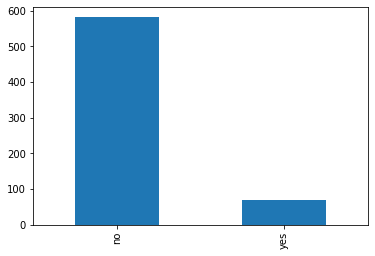

Univariate Analysis of  famsup


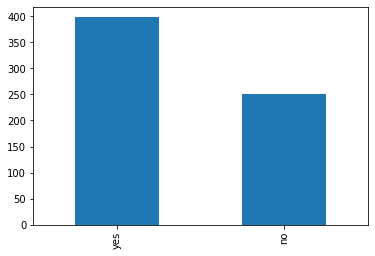

Univariate Analysis of  paid


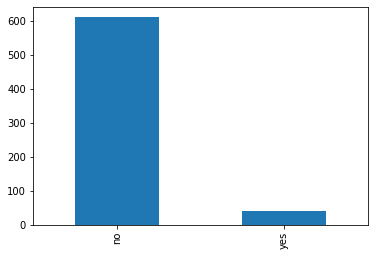

Univariate Analysis of  activities


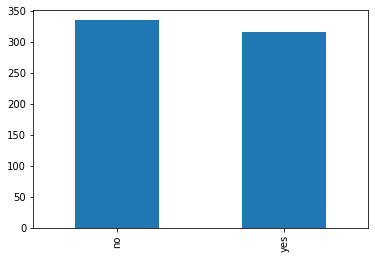

Univariate Analysis of  nursery


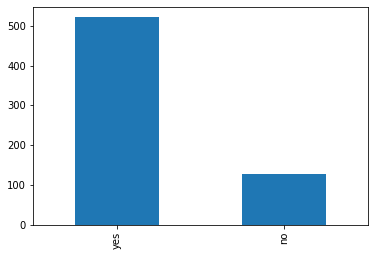

Univariate Analysis of  higher


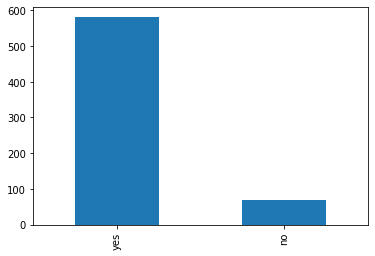

Univariate Analysis of  internet


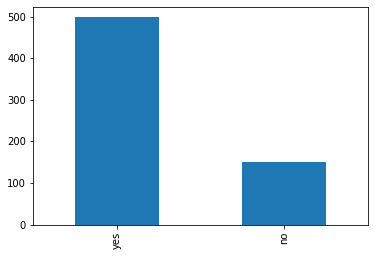

Univariate Analysis of  romantic


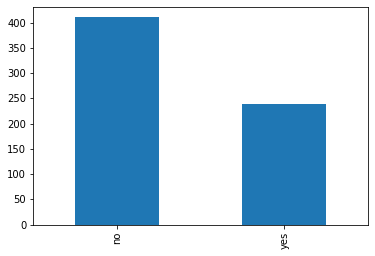

Univariate Analysis of  famrel


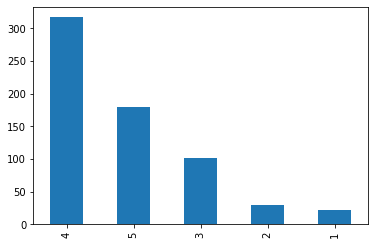

Univariate Analysis of  freetime


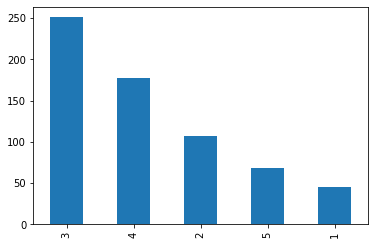

Univariate Analysis of  goout


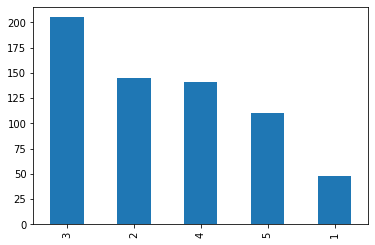

Univariate Analysis of  Dalc


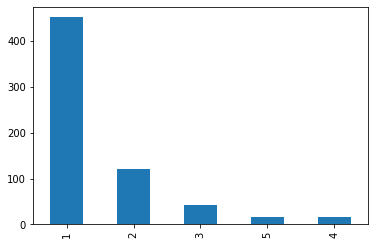

Univariate Analysis of  Walc


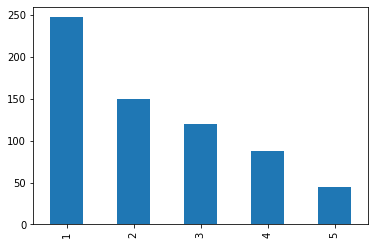

Univariate Analysis of  health


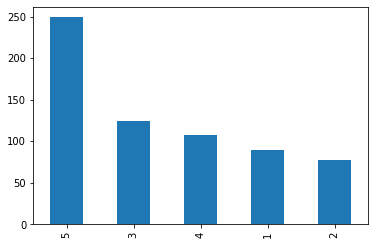

Univariate Analysis of  absences


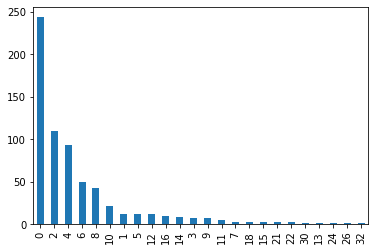

Univariate Analysis of  G1


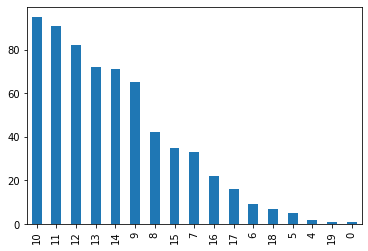

Univariate Analysis of  G2


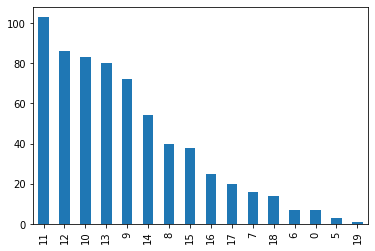

Univariate Analysis of  G3


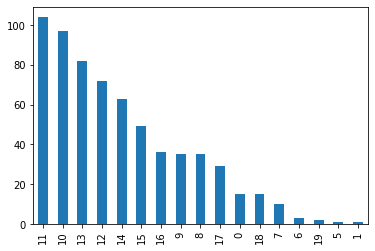

In [60]:
for col in df.columns:
    print("Univariate Analysis of ", col)
    fig = plt.figure()
    var = df[col].value_counts()
    
    var.plot(kind='bar')
    plt.xlabel=col
    plt.show()

### Decriptivtive Analysis: MultiVariate Analysis

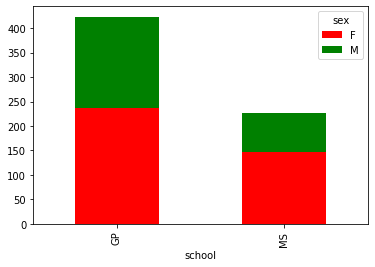

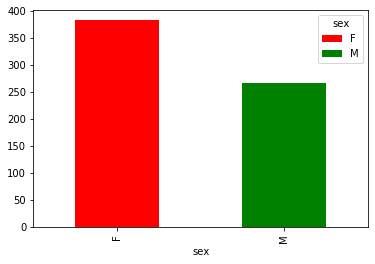

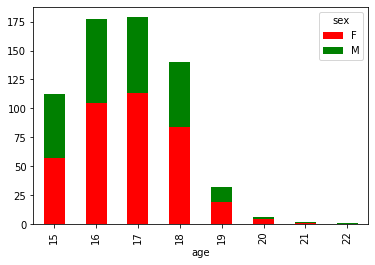

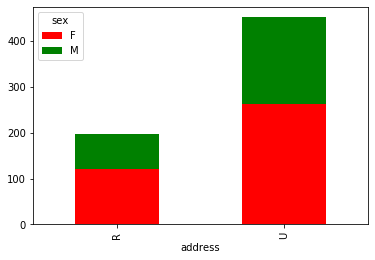

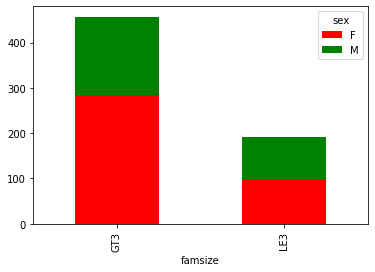

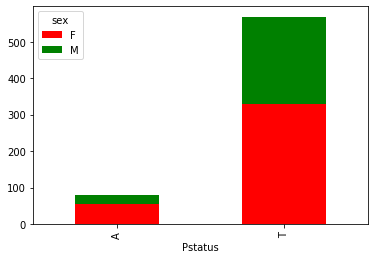

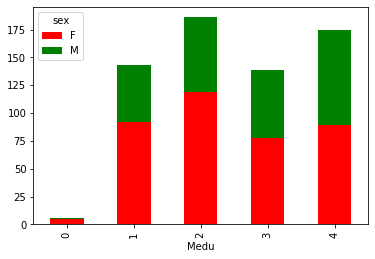

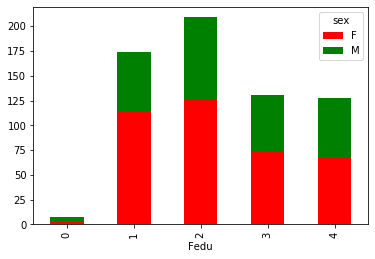

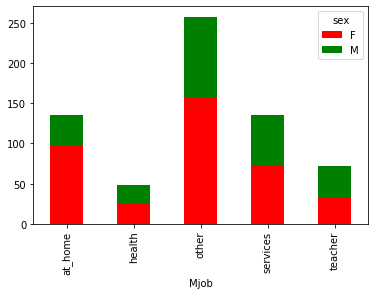

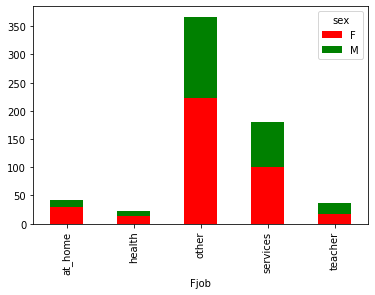

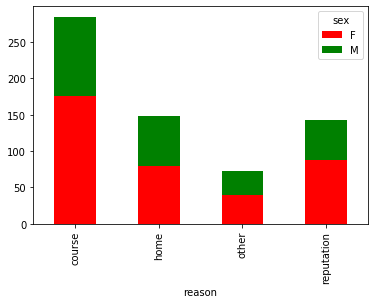

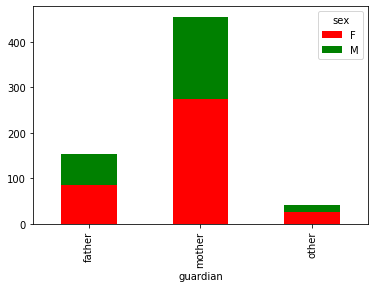

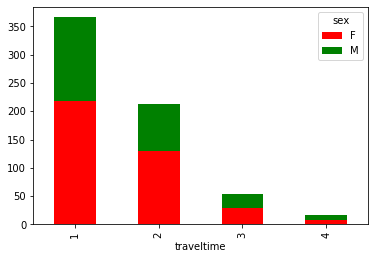

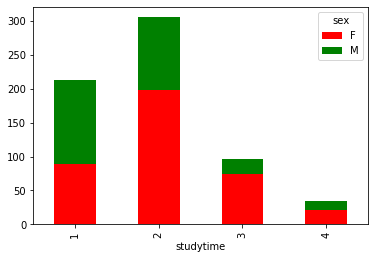

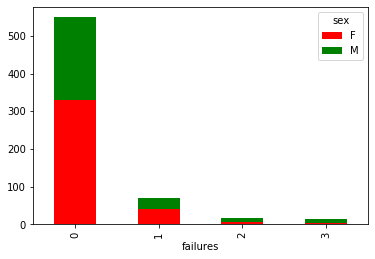

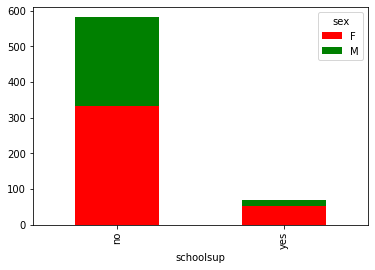

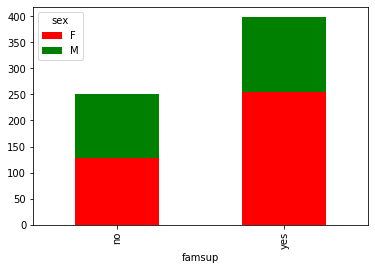

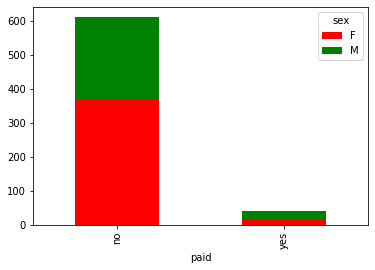

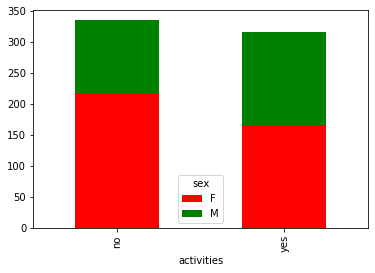

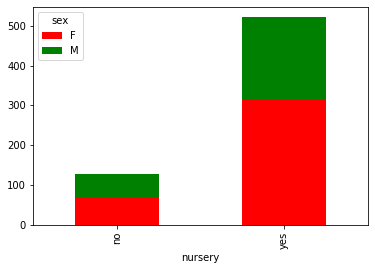

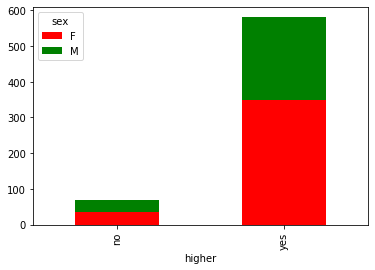

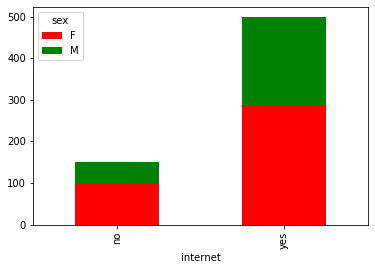

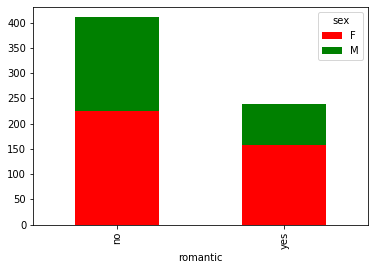

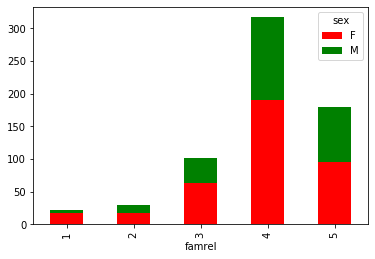

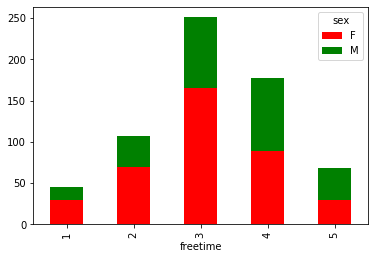

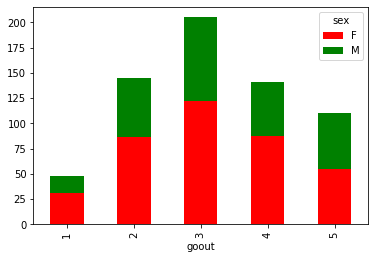

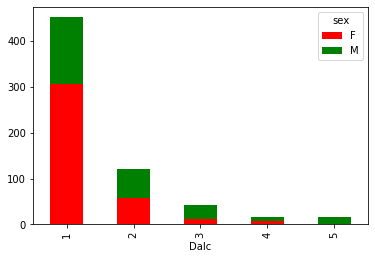

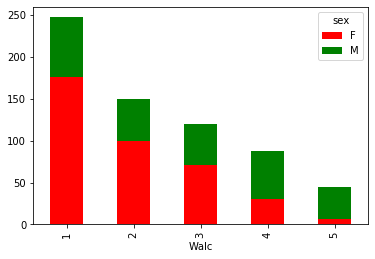

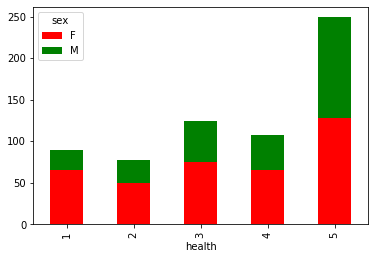

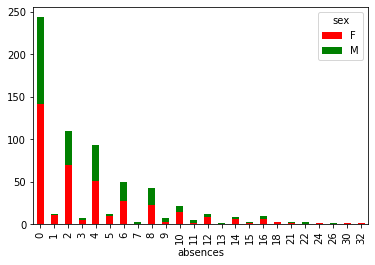

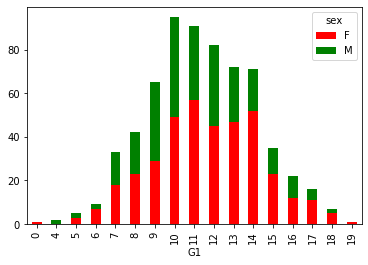

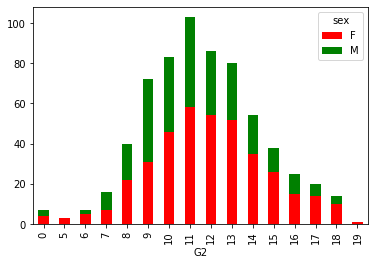

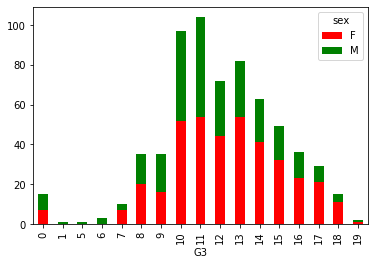

In [62]:
for col in df.columns:
    dep = pd.crosstab(df[col],df['sex'])
    dep.plot(kind='bar',stacked=True,color=['r','g','b'])
    plt.show()

### Converting Categorical Variables into Numeric Variable

In [ ]:
Encoding:

1-Find and replace: a manual approach to find and replace a categorical value to a numerical one.

2-Label Encoding: It is similar to the prior approach but its fully automatic.

3-One Hot Encoding: This approach will convert a categorical set of values to columns and assign 0 or 1 to each value. in sklearn we use labelBinarizer.

4-Custom Binary encoding: This process will combine many conditions and give a output in binary format.

5-Backward Difference Encoding

6-Polynomial Encoding.

#### We are going to use : Encode target labels with value between 0 and n_classes-1.

In [67]:
from sklearn.preprocessing import LabelEncoder
lblEncoder= LabelEncoder()

In [68]:
for col in df.columns:
    if df[col].dtype == 'object':
        df[col]=lblEncoder.fit_transform(df.loc[:,[col]])

/root/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [70]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,0,0,18,1,0,0,4,4,0,4,...,4,3,4,1,1,3,4,0,11,11
1,0,0,17,1,0,1,1,1,0,2,...,5,3,3,1,1,3,2,9,11,11
2,0,0,15,1,1,1,1,1,0,2,...,4,3,2,2,3,3,6,12,13,12
3,0,0,15,1,0,1,4,2,1,3,...,3,2,2,1,1,5,0,14,14,14
4,0,0,16,1,0,1,3,3,2,2,...,4,3,2,1,2,5,0,11,13,13


In [71]:
### Now lets check the coorelation matrix

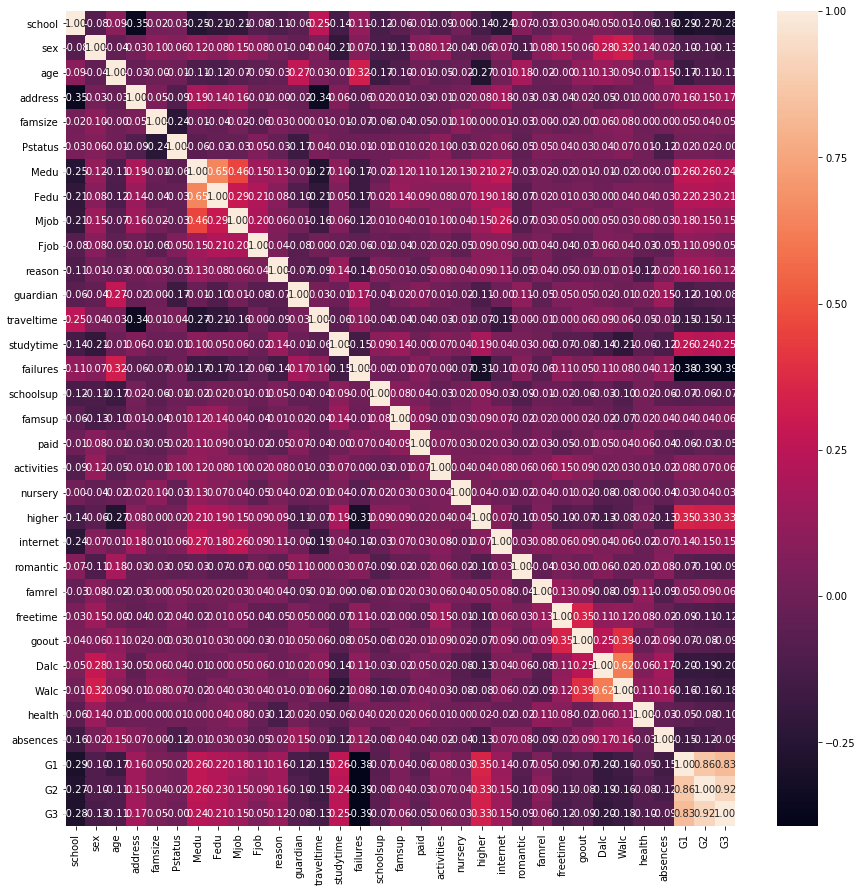

In [77]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(), annot = True , fmt=".2f")

In [78]:
df.corr()['G3'].sort_values()

failures     -0.393316
school       -0.284294
Dalc         -0.204719
Walc         -0.176619
sex          -0.129077
traveltime   -0.127173
freetime     -0.122705
age          -0.106505
health       -0.098851
absences     -0.091379
romantic     -0.090583
goout        -0.087641
guardian     -0.079609
schoolsup    -0.066405
paid         -0.054898
Pstatus      -0.000754
nursery       0.028752
famsize       0.045016
Fjob          0.052953
famsup        0.059206
activities    0.059791
famrel        0.063361
reason        0.124969
Mjob          0.148252
internet      0.150025
address       0.167637
Fedu          0.211800
Medu          0.240151
studytime     0.249789
higher        0.332172
G1            0.826387
G2            0.918548
G3            1.000000
Name: G3, dtype: float64

In [79]:
# https://scikit-learn.org/stable/modules/feature_selection.html#univariate-feature-selection

f_classif: ANOVA F-value between label/feature for classification tasks.

mutual_info_classif: Mutual information for a discrete target.

chi2: Chi-squared stats of non-negative features for classification tasks.

f_regression: F-value between label/feature for regression tasks.

mutual_info_regression: Mutual information for a continuous target.

SelectPercentile: Select features based on percentile of the highest scores.

SelectFpr: Select features based on a false positive rate test.

SelectFdr: Select features based on an estimated false discovery rate.

SelectFwe: Select features based on family-wise error rate.

GenericUnivariateSelect: Univariate feature selector with configurable mode.

In [86]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_regression


In [83]:
X = df.drop(['G3'], axis=1)
y = df['G3']

In [100]:
#apply SelectKBest class to extract top 15 best features
for i in [chi2,f_regression]:
    print("By Using function:  ",str(i))
    bestfeatures = SelectKBest(score_func=i, k=20)
    fit = bestfeatures.fit(X,y)
    dfscores = pd.DataFrame(fit.scores_)
    dfcolumns = pd.DataFrame(X.columns)
    #concat two dataframes for better visualization 
    featureScores = pd.concat([dfcolumns,dfscores],axis=1)
    featureScores.columns = ['Specs','Score']  #naming the dataframe columns
    print(featureScores.nlargest(len(df.columns),'Score'))

By Using function:   <function chi2 at 0x7f1864dd2378>
         Specs       Score
31          G2  418.452113
30          G1  333.615973
29    absences  294.362769
14    failures  255.779332
0       school   60.035797
26        Dalc   35.491003
8         Mjob   34.888847
10      reason   33.617500
6         Medu   33.567952
7         Fedu   32.368762
27        Walc   25.772026
15   schoolsup   21.756390
13   studytime   19.574536
28      health   14.518698
17        paid   13.252095
1          sex   12.930063
12  traveltime   12.919294
20      higher   11.343756
18  activities   11.131398
3      address   11.106601
22    romantic   10.741687
25       goout   10.105568
24    freetime    9.030872
4      famsize    8.130862
16      famsup    7.533753
9         Fjob    7.277847
11    guardian    6.306938
21    internet    5.694293
2          age    5.223356
19     nursery    3.187132
23      famrel    3.039747
5      Pstatus    0.487380
By Using function:   <function f_regression at 0x7f186

In [101]:
X = df.drop(['Pstatus','nursery','famsize','Fjob','paid','goout','famsup','absences','activities','famrel','schoolsup','guardian','romantic','G3'], axis=1)
y = df['G3']

In [102]:
#Data size is small so Kfold Split will work well, otherwise we can use Train-test split
from sklearn.model_selection import KFold           
from sklearn.model_selection import train_test_split
#To find the result/accuracy of the Model
from sklearn.model_selection import cross_val_score


In [103]:
#Train Test Split
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.27, 
                                                    random_state = 0)

In [104]:
#K fold
kfold = KFold(n_splits=10, random_state=7)

## Simple Linear Regression

In [107]:
#Model fit on train test split
model = LinearRegression()
model.fit(x_train,y_train)
scoring = 'neg_mean_squared_error'
model.score(x_test, y_test)

0.8622645500440727

In [114]:
#Model fit on train test split
model = LinearRegression()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-1.7137934407897615 1.4762015104439075


In [115]:
# R2 explains the 
scoring = 'r2'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

0.8159962174738048 0.0925089859600051


### R square or coefficient of determination, denoted R2 or r2 and pronounced “R squared” ,
Shows percentage variation in y which is explained by all the x variables together. Higher the better. 
It is always between 0 and 1. It can never be negative – since it is a squared value. 
Every time you add a data point in regression analysis, R2 will increase. R2 never decreases.

### Ridge Regression

In [117]:
from sklearn.linear_model import Ridge

In [126]:
kfold = KFold(n_splits=10, random_state=7)
model = Ridge(alpha=1.0, fit_intercept=True, 
              normalize=False, copy_X=True, max_iter=None, tol=0.001, solver='auto', random_state=None)
model.fit(X,y)
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

-1.7124280126732032 1.4752069055346684


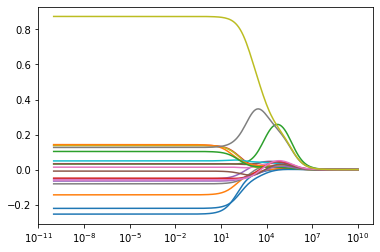

In [152]:
import matplotlib.pyplot as plt
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)
#alphas=[0.05,0.01,0.1,0.0000002,100000000]
#print(alphas)
coefs = []
for a in alphas:
    ridge = Ridge(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    #print(ridge.coef_)
    
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

## Lasso Regression

In [160]:
from sklearn.linear_model import Lasso
import warnings 
warnings.filterwarnings("ignore") 

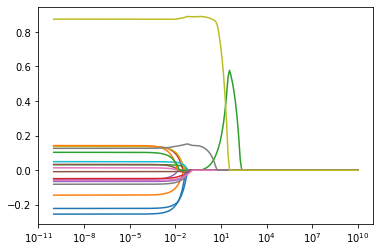

In [161]:
import matplotlib.pyplot as plt
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)
#alphas=[0.05,0.01,0.1,0.0000002,100000000]

coefs = []
for a in alphas:
    ridge = Lasso(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    #print(ridge.coef_)
    
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

### ElasticNet Regression

In [165]:
from sklearn.linear_model import ElasticNet
# a * L1 + b * L2
# alpha = a + b and l1_ratio = a / (a + b)

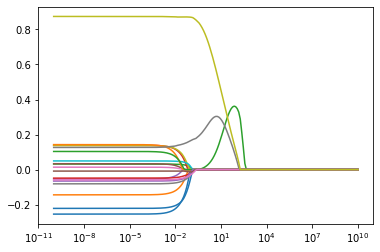

In [166]:
import matplotlib.pyplot as plt
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)
#alphas=[0.05,0.01,0.1,0.0000002,100000000]

coefs = []
for a in alphas:
    ridge = ElasticNet(alpha=a, fit_intercept=False)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)
    #print(ridge.coef_)
    
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])

plt.show()

In [ ]:
## How to predict values

In [167]:
Y_pred=model.predict(X)
print(Y_pred[0:5])

[10.82956864 11.29300886 13.16458133 14.12611425 13.11308797]


### Decision Tree 

#### Decision Tree is Used For Both Classification & Regression Problem

In [171]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-3.6208413461538465


### Support Vector Regressor

In [172]:
from sklearn.svm import SVR

In [173]:
model = SVR()
scoring = 'neg_mean_squared_error'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean())

-3.5187374876522997


In [174]:
model =SVR()
model.fit(X,y)
scoring = 'r2'
results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
print(results.mean(), results.std())

0.6823265708464212 0.14824625050128187
